Taken from [keras/example](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py)

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using Theano backend.


In [20]:
batch_size = 128 # Number of samples to send in one epoch
num_classes = 10
epochs = 5 # Number of passes over the training data

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # at ~/.keras/datasets

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [22]:
print (x_train.shape)

(60000, 784)


In [23]:
vis = x_train[0]
vis = vis.reshape(28, 28)

In [24]:
import matplotlib.pyplot as plt
plt.imshow(vis, cmap=plt.get_cmap('gray'))

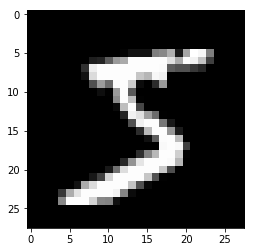

In [25]:
plt.show()

In [26]:
print (y_train[0])

5


In [27]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print (y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [28]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,962
Trainable params: 669,962
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s - loss: 0.2422 - acc: 0.9244 - val_loss: 0.1105 - val_acc: 0.9659
Epoch 2/5
60000/60000 [==============================] - 22s - loss: 0.0887 - acc: 0.9725 - val_loss: 0.0927 - val_acc: 0.9727
Epoch 3/5
60000/60000 [==============================] - 25s - loss: 0.0606 - acc: 0.9819 - val_loss: 0.0967 - val_acc: 0.9730
Epoch 4/5
60000/60000 [==============================] - 23s - loss: 0.0466 - acc: 0.9859 - val_loss: 0.0834 - val_acc: 0.9794
Epoch 5/5
60000/60000 [==============================] - 27s - loss: 0.0368 - acc: 0.9884 - val_loss: 0.0966 - val_acc: 0.9760


In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0966140645179
Test accuracy: 0.976


In [32]:
model = Sequential()
model.add(Dense(512, activation='softmax', input_shape=(784,)))
model.add(Dense(256, activation='softmax'))
model.add(Dense(512, activation='softmax'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,962
Trainable params: 669,962
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s - loss: 2.3015 - acc: 0.1118 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 2/5
60000/60000 [==============================] - 24s - loss: 2.3006 - acc: 0.1124 - val_loss: 2.2967 - val_acc: 0.1135
Epoch 3/5
60000/60000 [==============================] - 25s - loss: 2.2514 - acc: 0.1515 - val_loss: 2.1643 - val_acc: 0.2087
Epoch 4/5
60000/60000 [==============================] - 25s - loss: 2.0377 - acc: 0.2074 - val_loss: 1.9226 - val_acc: 0.2097
Epoch 5/5
60000/60000 [==============================] - 24s - loss: 1.8495 - acc: 0.2083 - val_loss: 1.8005 - val_acc: 0.2095


In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.80054370155
Test accuracy: 0.2095
